In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [5]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('D:\capstone final project\multiple-disease-prediction-streamlit-app-main\dataset\diabetes.csv') 

In [6]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [8]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [10]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [12]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [13]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [16]:
classifier = svm.SVC(kernel='linear')

In [17]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [18]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [19]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [20]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [21]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


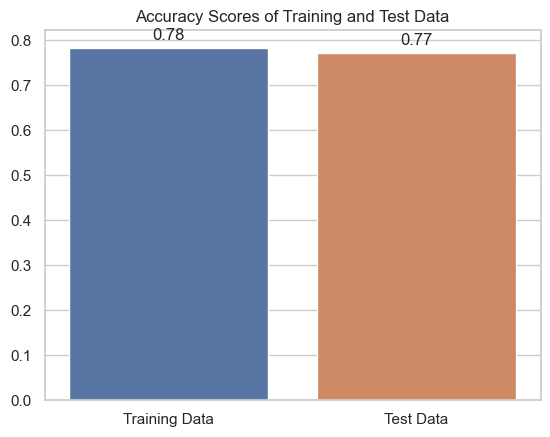

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have calculated training_data_accuracy and test_data_accuracy

# Create a bar plot using Seaborn
data = {
    'Data Type': ['Training Data', 'Test Data'],
    'Accuracy Score': [training_data_accuracy, test_data_accuracy]
}

sns.set(style="whitegrid")
ax = sns.barplot(x="Data Type", y="Accuracy Score", data=data)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Set the title
plt.title('Accuracy Scores of Training and Test Data')

# Show the plot
plt.show()


Accuracy score of the training data: 0.7833876221498371
Accuracy score of the test data: 0.7727272727272727


c:\Users\Jayaram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


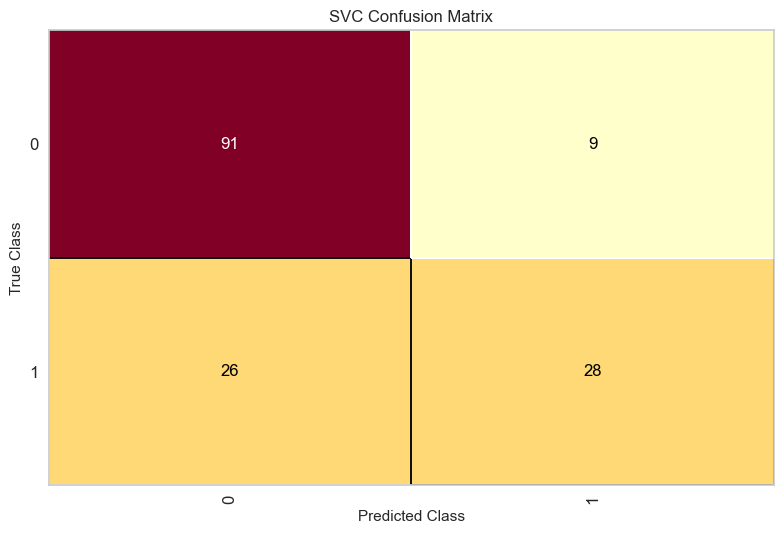

c:\Users\Jayaram\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\classifier\confusion_matrix.py:333: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout()
c:\Users\Jayaram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


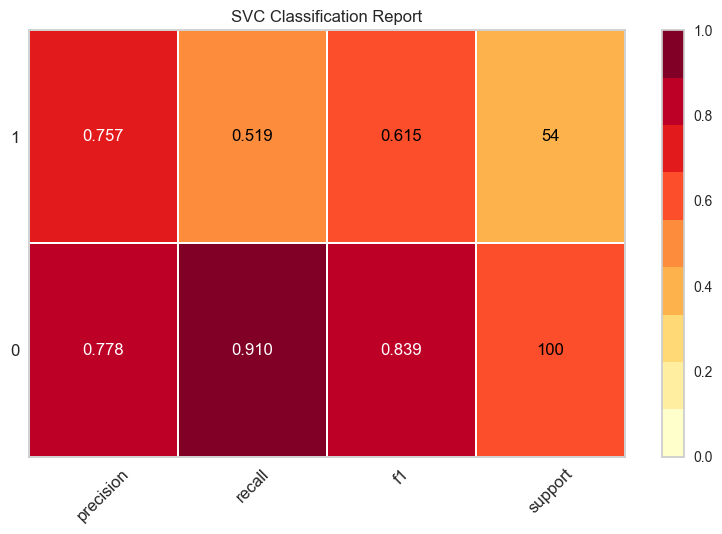

YellowbrickTypeError: The supplied model is not a clustering estimator; try a classifier or regression score visualizer instead!

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.classifier import confusion_matrix as cm
from yellowbrick.classifier import ClassificationReport

# Load dataset
diabetes_dataset = pd.read_csv('D:\capstone final project\multiple-disease-prediction-streamlit-app-main\dataset\diabetes.csv')

# Separate features and target variable
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# SVM classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

# Predictions
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

# Accuracy scores
print('Accuracy score of the training data:', training_data_accuracy)
print('Accuracy score of the test data:', test_data_accuracy)

# Confusion matrix
confusion_matrix_visualizer = cm(classifier, X_train, Y_train, X_test, Y_test)
confusion_matrix_visualizer.show()

# Classification report
visualizer = ClassificationReport(classifier, support=True)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.show()

# Clusters - Using Yellowbrick's KElbowVisualizer to determine the optimal number of clusters
visualizer = KElbowVisualizer(classifier, k=(2,6))
visualizer.fit(X_train)
visualizer.show()

# Heatmap of the training data
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_train, X_train_prediction), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Heatmap of the test data
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, X_test_prediction), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy score of the training data :  0.7833876221498371
Accuracy score of the test data :  0.7727272727272727


c:\Users\Jayaram\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Jayaram\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Jayaram\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Jayaram\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now 

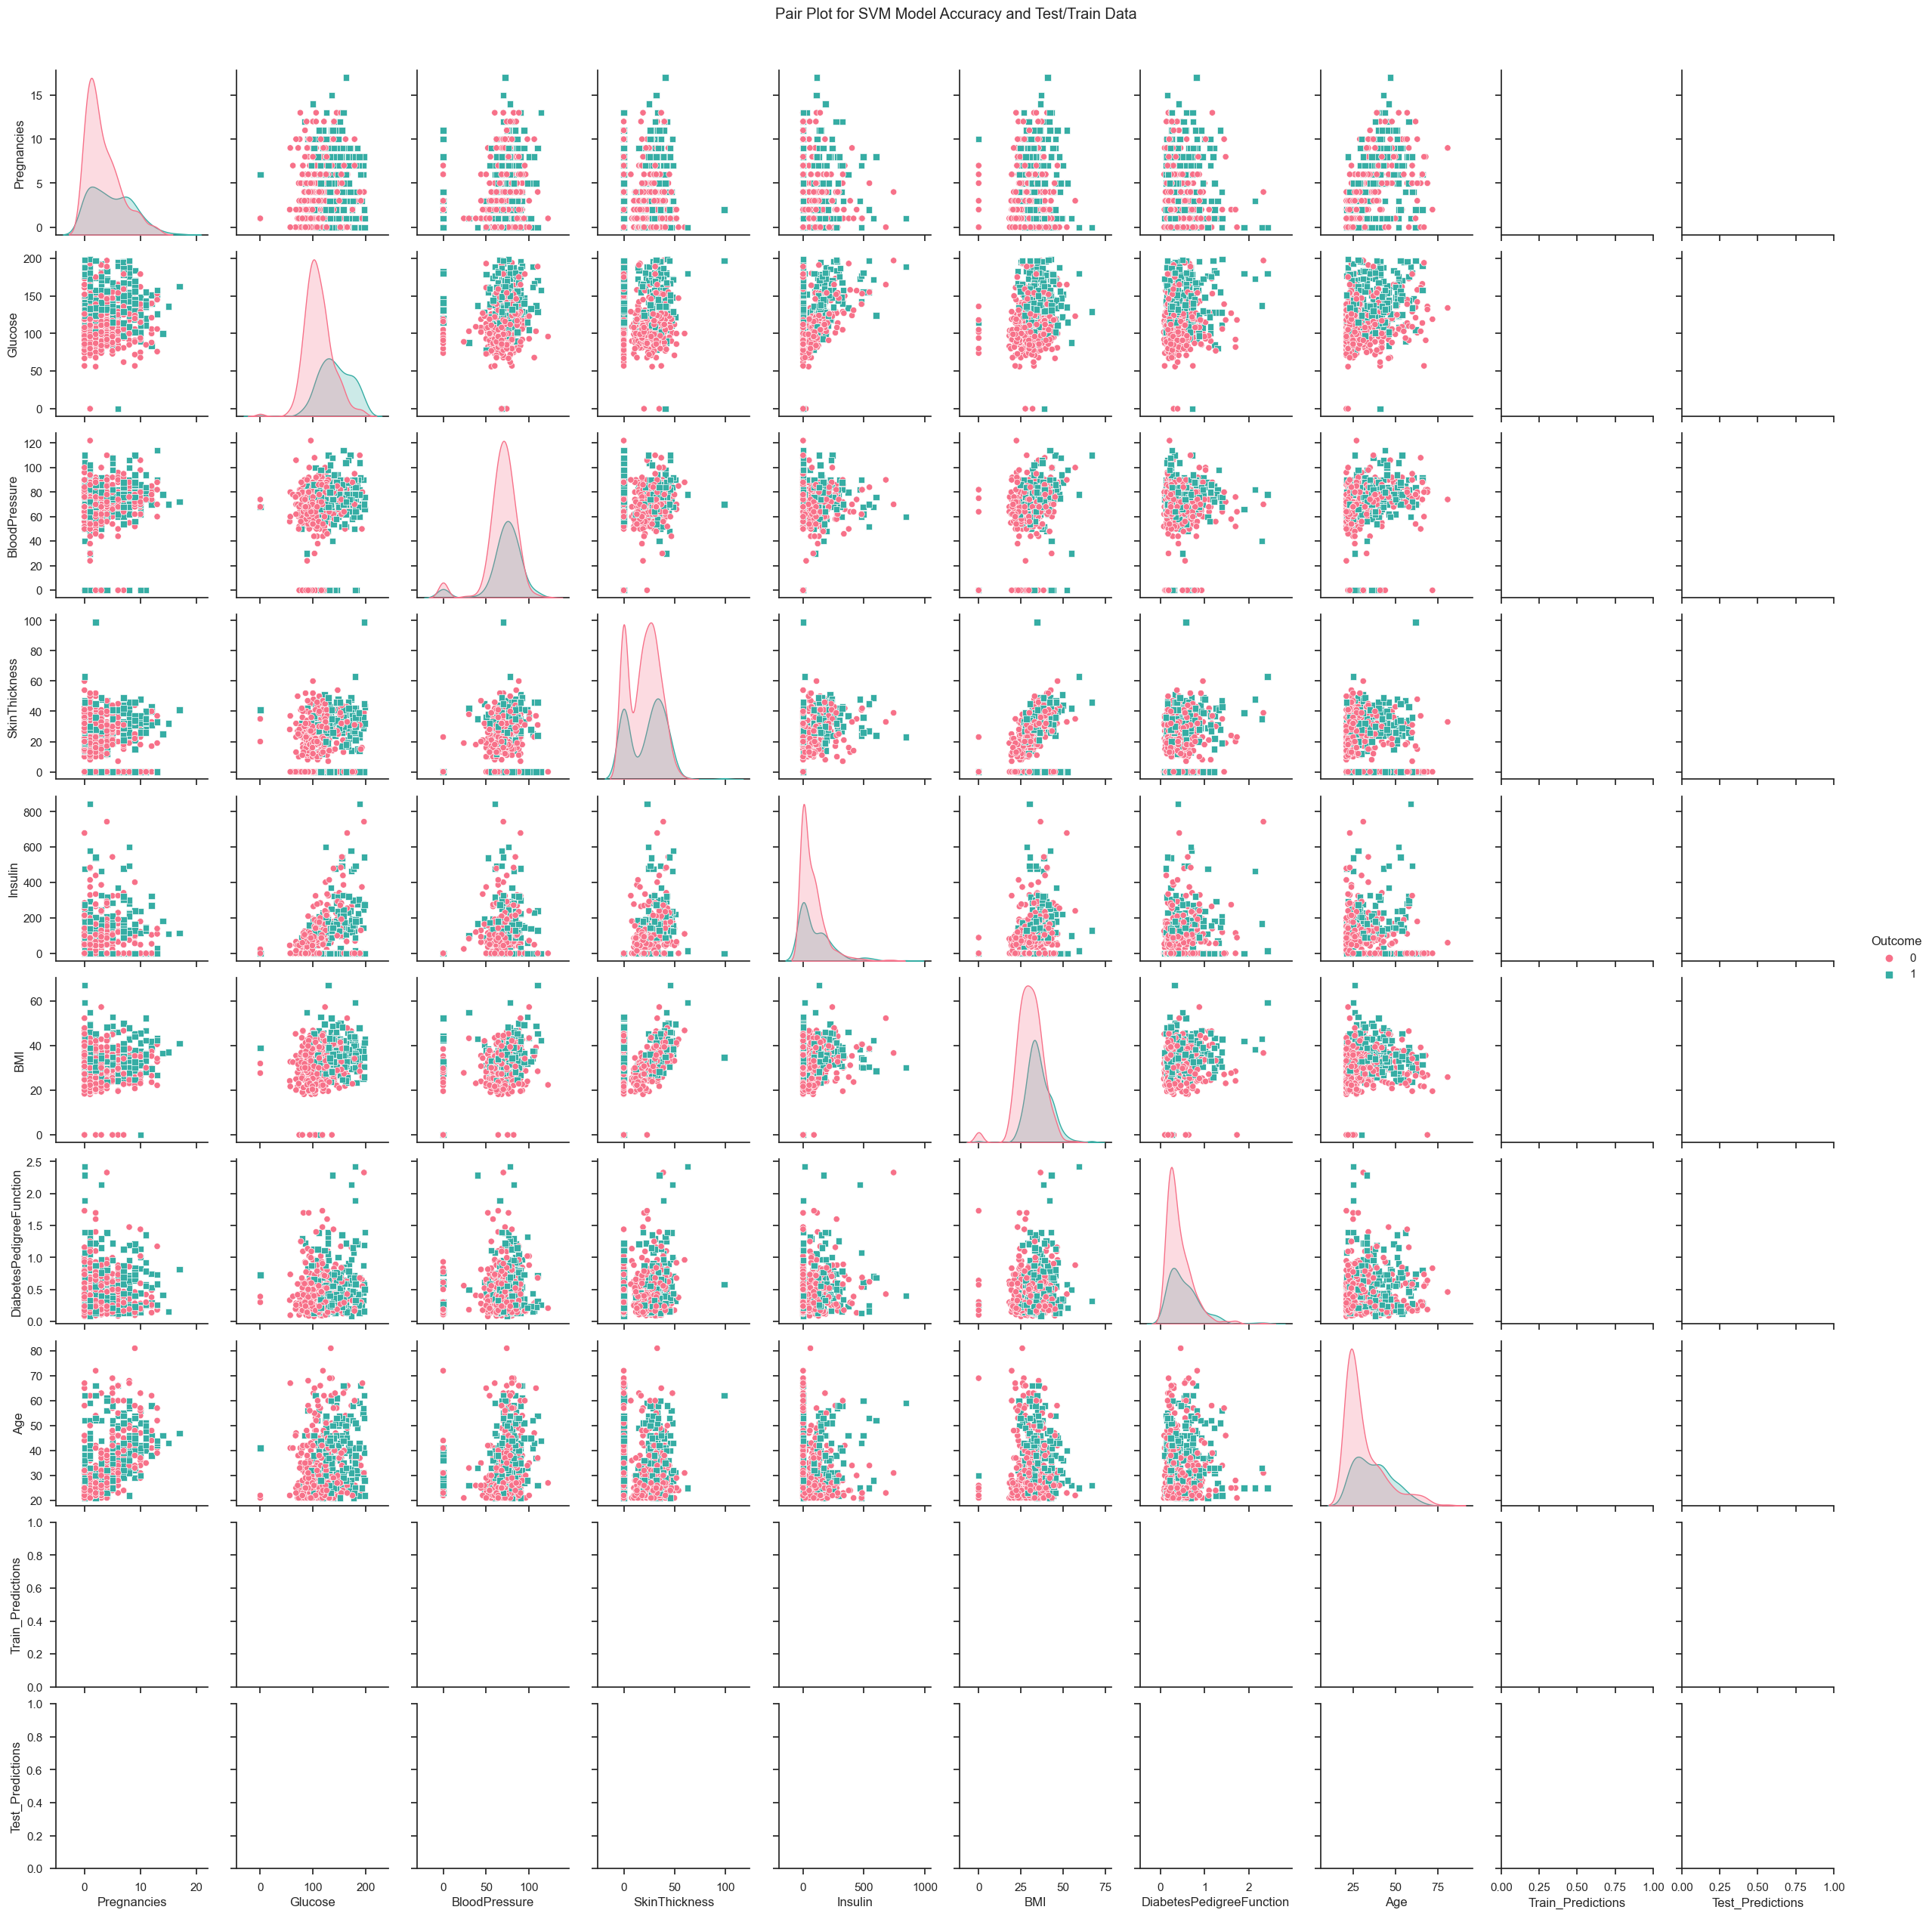

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load the dataset
diabetes_dataset = pd.read_csv('D:\capstone final project\multiple-disease-prediction-streamlit-app-main\dataset\diabetes.csv')

# Prepare the data
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Initialize SVM classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

# Calculate accuracy scores
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

# Create DataFrame for pair plot
pairplot_df = X_train.copy()
pairplot_df['Outcome'] = Y_train

# Add placeholder predictions for train and test sets
pairplot_df['Train_Predictions'] = np.nan
pairplot_df['Test_Predictions'] = np.nan

# Set style
sns.set(style="ticks")

# Generate pair plot
sns.pairplot(pairplot_df, hue="Outcome", markers=["o", "s"], palette="husl", diag_kind='kde', diag_kws=dict(shade=True))

# Title for the plot
plt.suptitle('Pair Plot for SVM Model Accuracy and Test/Train Data', y=1.02)

# Show the plot
plt.show()


Making a Predictive System

In [19]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Saving the trained model

In [20]:
import pickle

In [21]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [22]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [23]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [24]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
